In [1]:
import itertools
import random

import gym
import numpy as np

import matplotlib.pyplot as plt

state_size = 16
action_size = 4

gamma = 0.95  # Discounting rate
learning_rate = 0.8

epsilon_start = 1.0
epsilon_min = 0.01

Q = np.zeros([state_size, action_size])

In [2]:
def setup_agent():
    epsilon_decay = (epsilon_start - epsilon_min) / 50000
    curr_epsilon = epsilon_start

    def update_epsilon():
        nonlocal curr_epsilon
        if curr_epsilon > epsilon_min:
            curr_epsilon -= epsilon_decay

    def should_explore():
        return np.random.rand() <= curr_epsilon

    def policy_fn(state):
        if should_explore():
            return random.randrange(action_size)
        return np.argmax(Q[state, :])

    def update_fn(state, action, reward, next_state, done):
        Q[state, action] = Q[state, action] + learning_rate * (
                reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        update_epsilon()
        return curr_epsilon

    return policy_fn, update_fn

In [3]:
def learning(env, policy_fn, update_agent_fn, num_episodes, render=False):
    rewards = []
    for _ in range(num_episodes):

        state = env.reset()
        reward_sum = 0
        for _ in itertools.count():

            if render:
                env.render()

            action = policy_fn(state)

            next_state, reward, done, _ = env.step(action)
            curr_epsilon = update_agent_fn(state, action, reward, next_state, done)

            state = next_state
            reward_sum += reward
            if done:
                if reward_sum != 0:
                    print('Epsilon:', curr_epsilon, ' Reward sum: ', reward_sum)
                rewards.append(reward_sum)
                break

    return rewards

In [4]:
environment = gym.envs.make('FrozenLake-v0')

policy, update_agent = setup_agent()
rewards = learning(environment, policy, update_agent, 5000)

Epsilon: 0.9809127999999863  Reward sum:  1.0
Epsilon: 0.9614493999999723  Reward sum:  1.0
Epsilon: 0.9536481999999666  Reward sum:  1.0
Epsilon: 0.951410799999965  Reward sum:  1.0
Epsilon: 0.936026199999954  Reward sum:  1.0
Epsilon: 0.9333927999999521  Reward sum:  1.0
Epsilon: 0.9231957999999447  Reward sum:  1.0
Epsilon: 0.9226215999999443  Reward sum:  1.0
Epsilon: 0.9189783999999417  Reward sum:  1.0
Epsilon: 0.9176121999999407  Reward sum:  1.0
Epsilon: 0.9052173999999318  Reward sum:  1.0
Epsilon: 0.8865261999999183  Reward sum:  1.0
Epsilon: 0.8858727999999179  Reward sum:  1.0
Epsilon: 0.8793189999999131  Reward sum:  1.0
Epsilon: 0.8619543999999006  Reward sum:  1.0
Epsilon: 0.8477973999998905  Reward sum:  1.0
Epsilon: 0.8448273999998883  Reward sum:  1.0
Epsilon: 0.8417583999998861  Reward sum:  1.0
Epsilon: 0.8317989999998789  Reward sum:  1.0
Epsilon: 0.8250669999998741  Reward sum:  1.0
Epsilon: 0.8213049999998714  Reward sum:  1.0
Epsilon: 0.7930899999998511  Reward 

Epsilon: 0.01978119999954349  Reward sum:  1.0
Epsilon: 0.019187199999543478  Reward sum:  1.0
Epsilon: 0.018989199999543474  Reward sum:  1.0
Epsilon: 0.017999199999543455  Reward sum:  1.0
Epsilon: 0.015900399999543416  Reward sum:  1.0
Epsilon: 0.01558359999954341  Reward sum:  1.0
Epsilon: 0.014890599999543397  Reward sum:  1.0
Epsilon: 0.013920399999543379  Reward sum:  1.0
Epsilon: 0.012752199999543357  Reward sum:  1.0
Epsilon: 0.010910799999543322  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:  1.0
Epsilon: 0.009999999999543305  Reward sum:


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Epsilon: 0.009999999999543305  Reward sum:  1.0

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG

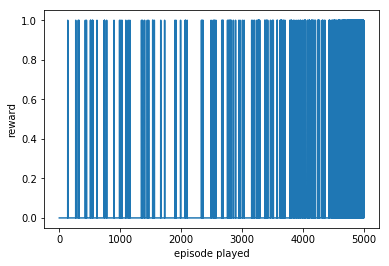

In [5]:
# lets play using Q values
environment.reset()
learning(environment, policy, update_agent, 5, True)
environment.close()

plt.plot(np.array(rewards))
plt.ylabel('reward')
plt.xlabel('episode played')
plt.show()


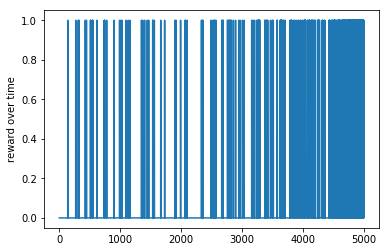

In [7]:
import matplotlib.pyplot as plt
plt.plot(np.array(rewards))
plt.ylabel('reward over time')
plt.show()